## Data Analytics
### Lab 6.
Alicja Bogusz

In [87]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)  # only valid on Windows

from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

Installing CmdStan version: 2.32.0
Install directory: /root/.cmdstan
CmdStan version 2.32.0 already installed
Installing CmdStan version: 2.32.0
Install directory: /root/.cmdstan
CmdStan version 2.32.0 already installed


In [88]:
F = len("Alicja")
L = len("Bogusz")
N = (L+F)*100
print(F, L, N)

6 6 1200


# Excercise 1 - generate data

In [89]:
gen_quant_1 = CmdStanModel(stan_file='code_1.stan')
gen_quant_2 = CmdStanModel(stan_file='code_2.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:found newer exe file, not recompiling


In [90]:
samples_1 = gen_quant_1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

samples_2 = gen_quant_2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/wdbsqe7w.json
DEBUG:cmdstanpy:cmd: /content/code_1 info
cwd: None
10:19:56 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_1', 'id=1', 'random', 'seed=91561', 'data', 'file=/tmp/tmp9u7zf6hp/wdbsqe7w.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_1mtfgbg9f/code_1-20230427101956.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


10:19:56 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_1', 'id=1', 'random', 'seed=91561', 'data', 'file=/tmp/tmp9u7zf6hp/wdbsqe7w.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_1mtfgbg9f/code_1-20230427101956.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_1mtfgbg9f/code_1-20230427101956.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_1mtfgbg9f/code_1-20230427101956_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_2', 'id=1', 'random', 'seed=10771', 'data', 'file=/tmp/tmp9u7zf6hp/ggoet8x1.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_2p6b8k5ez/code_2-20230427101957.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


10:19:59 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_2', 'id=1', 'random', 'seed=10771', 'data', 'file=/tmp/tmp9u7zf6hp/ggoet8x1.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_2p6b8k5ez/code_2-20230427101957.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_2p6b8k5ez/code_2-20230427101957.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_2p6b8k5ez/code_2-20230427101957_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 =

In [91]:
df_1 = samples_1.draws_pd()
df_1 = df_1.drop(df_1.columns[0:3], axis=1)
df_1

,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,-0.369472,0.679070,-0.511408,0.589448,0.742958,1.421700,0.290361,-0.983103,-2.824810,1.939920,...,-0.599937,-0.900991,1.968200,-1.422560,2.219590,0.999827,-0.716975,0.628124,-0.460270,1.471570
1,-1.268670,1.499400,0.831383,-0.566012,1.727880,-0.296579,1.277580,1.430960,0.991543,-0.237170,...,0.452452,2.176580,-0.337975,-0.371074,-0.531481,0.695602,0.368468,0.347147,-0.903387,0.558397
2,1.332120,0.307152,-1.012440,1.124030,-0.557848,-0.691266,1.133740,0.328686,-0.318233,0.930979,...,0.529991,0.296544,-0.115800,-0.148115,-0.104095,-0.849412,-0.303839,-2.066460,-0.425590,-0.377160
3,0.577021,2.033110,-0.129491,0.333311,-0.419443,-0.458388,-0.449413,-1.644980,-0.348012,-0.375571,...,-1.114020,0.812297,0.087298,-2.723870,0.444818,0.651885,0.477030,0.550886,-1.532050,-2.178810
4,-0.208850,-0.417636,-1.789520,-1.398800,-0.764581,0.485378,-0.146994,-0.137866,1.072670,0.497043,...,-2.567640,-0.041949,0.726219,0.256951,2.067360,-0.649144,-0.073999,-1.701090,0.671196,-0.660256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.591910,-0.138665,0.396499,-1.212720,-0.392966,0.775856,-0.488013,-1.844790,-0.799440,-0.228805,...,-0.371182,0.344987,-0.885751,0.879034,-1.093690,-1.142220,-0.838300,-0.009433,0.399922,-0.509207
996,0.147039,1.540860,0.641191,-1.824470,-0.117766,1.025400,-1.481090,-1.195680,-0.475269,0.613147,...,-0.947531,0.005995,0.122093,-0.778347,-0.831852,-0.659196,-1.103780,0.451041,-0.936264,0.709378
997,0.078208,0.054190,-1.184980,-0.746563,-0.494202,-1.494270,-1.342660,-0.708369,0.185391,1.051540,...,0.272903,0.276170,-2.009410,-1.114560,0.585598,-0.537258,-1.325070,1.253700,0.222012,0.588448
998,-1.896480,1.398260,8.106250,-0.366155,-2.251580,-1.221740,-0.614470,0.186442,-0.505370,2.119430,...,2.695320,0.190531,-1.554660,0.826436,1.604110,0.043961,0.101972,0.739105,-0.140621,0.145522


In [92]:
df_2 = samples_2.draws_pd()
df_2 = df_2.drop(df_2.columns[0:3], axis=1)
df_2

,"X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]","X[9,1]","X[10,1]","X[11,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,-0.513504,-0.708107,-0.037890,-0.307499,0.521260,-0.637070,-1.634160,-1.152270,-2.030510,0.673812,...,-2.074190,-1.432220,0.975281,0.340431,-2.362390,-0.629743,1.173620,0.166617,0.888540,-2.581020
1,-0.186459,-0.892264,-0.339888,-0.482871,1.084960,-0.956441,0.168952,0.056905,2.152890,0.832097,...,0.955607,-0.113318,0.859302,-1.144360,-1.922240,-1.353920,1.224250,5.463720,4.200830,0.898666
2,-1.242680,-0.519708,-0.272738,-0.661476,0.667332,-0.278950,-0.896901,0.273197,-0.595941,-0.324041,...,1.334400,-5.479970,-2.673310,-0.508714,0.484435,-4.122160,0.372907,1.274790,-2.312000,1.448540
3,-0.315994,-0.704366,0.090599,1.081730,1.830940,-0.087687,3.653450,-1.819410,1.473070,0.614765,...,0.498697,4.609000,1.209580,-4.887120,-0.508362,0.991641,4.324770,-4.222130,-6.127440,5.850060
4,1.522770,1.304290,1.161350,-0.480565,-0.174180,-0.781762,1.161790,0.704055,0.963260,1.479500,...,0.526625,-1.818470,0.950959,-2.669800,-2.022750,-0.500663,-0.183288,2.448550,-3.137940,3.040770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.579020,-0.163512,0.649972,-0.361631,-1.132740,1.612640,-0.406456,1.066830,0.367706,-0.614869,...,-1.244620,-0.295647,3.483090,-0.856131,-1.997370,1.789440,2.896280,-2.827800,0.973216,-3.501990
996,3.569190,0.736987,0.687243,-1.167870,-1.124010,0.019513,1.441970,-0.869612,-0.001696,-0.966984,...,-0.463500,0.366693,2.024780,0.353272,-2.427290,2.070030,3.377440,3.105980,0.499413,0.821310
997,-1.920310,-0.205541,0.797836,0.668002,0.457238,-0.536422,-0.177883,0.034521,0.736578,-0.143327,...,2.131640,-0.628789,-3.031830,-1.437820,3.303910,3.218490,-0.088342,-1.742370,1.281850,-2.333360
998,-0.645153,-0.281310,0.590822,-1.493720,2.440060,-1.150380,0.404966,-0.478423,1.825010,-0.124322,...,0.244306,0.993287,0.517579,3.024580,0.662697,-2.941340,2.698840,2.113970,2.195020,0.781590


# Excercise 2 - compare normal and student models for data from first file

In [93]:
gen_quant_3 = CmdStanModel(stan_file='code_3.stan')
gen_quant_4 = CmdStanModel(stan_file='code_4.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:found newer exe file, not recompiling


In [94]:
data3 = {'N':N, 'y': df_1[['y[{0}]'.format(i) for i in range(1, N+1)]].mean()}
data4 = {'N':N, 'y': df_2[['y[{0}]'.format(i) for i in range(1, N+1)]].mean()}

In [72]:
fit1 = gen_quant_3.sample(data3, seed=28052020)
fit2 = gen_quant_4.sample(data4, seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/62iy45is.json
DEBUG:cmdstanpy:cmd: /content/code_3 info
cwd: None
10:17:57 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_3', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/62iy45is.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_3', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/62iy45is.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_3', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/62iy45is.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:18:03 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_3', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/62iy45is.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_1.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_34bh0coq2/code_3-20230427101757_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Def

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/2n8xyoi3.json
DEBUG:cmdstanpy:cmd: /content/code_4 info
cwd: None
10:18:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_4', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/2n8xyoi3.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_4', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/2n8xyoi3.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_4', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/2n8xyoi3.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:18:14 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_4', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/2n8xyoi3.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_1.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_4dcm1di3g/code_4-20230427101804_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Def

In [73]:
fit1_df = fit1.draws_pd()
fit1_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,1798.05,0.786745,0.482360,2.0,5.0,0.0,-1796.52,0.052534,0.097632,1.91177,...,0.053779,0.047824,0.122940,0.075959,0.072193,0.152260,0.203703,0.088593,0.104724,0.169860
1,1799.51,0.896179,0.482360,2.0,7.0,0.0,-1797.07,0.053909,0.099338,1.90609,...,0.113548,0.107010,0.032216,0.034191,0.025209,0.005935,0.111111,0.158182,0.108827,0.142086
2,1797.09,0.548376,0.482360,1.0,3.0,0.0,-1796.85,0.053775,0.096263,1.88143,...,0.091154,0.098648,0.187679,0.178602,0.133128,0.136825,-0.028524,0.085081,0.118297,0.098812
3,1798.89,0.992244,0.482360,2.0,7.0,0.0,-1797.17,0.054539,0.101066,1.90985,...,0.207776,0.066668,0.026344,0.154857,0.130885,0.049490,0.105711,-0.018691,0.127233,0.074217
4,1799.18,0.974389,0.482360,2.0,7.0,0.0,-1797.45,0.053579,0.101057,1.92465,...,0.067089,0.087257,0.151606,0.123423,0.087452,0.196645,0.099026,-0.013476,0.091335,0.183132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1798.32,0.892699,0.438735,2.0,7.0,0.0,-1798.05,0.053173,0.097398,1.90036,...,0.172114,0.129038,0.099904,0.098032,0.106249,0.128199,0.127944,0.127453,0.045621,0.020774
3996,1798.02,0.963281,0.438735,2.0,3.0,0.0,-1797.81,0.053157,0.102300,1.94056,...,0.088581,0.065852,0.008882,0.112122,0.187739,0.092576,0.031910,0.126224,-0.003158,0.019892
3997,1797.80,0.952237,0.438735,2.0,3.0,0.0,-1797.25,0.054017,0.096824,1.88309,...,0.209610,0.082657,0.153349,0.141777,0.158144,0.122602,0.129886,-0.067514,0.078044,0.054849
3998,1797.42,0.961353,0.438735,2.0,3.0,0.0,-1796.57,0.052499,0.102365,1.95160,...,0.048760,0.091812,0.199952,0.076412,0.156855,0.080170,0.176493,0.068455,0.098420,0.104837


In [74]:
fit2_df = fit2.draws_pd()
fit2_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,1314.28,0.999973,0.499518,2.0,3.0,0.0,-1310.32,0.080383,0.001269,58.4566,...,0.107938,0.121205,-0.045562,0.050631,-0.014101,-0.011732,-0.018682,0.034283,-0.143369,0.003383
1,1313.42,0.895608,0.499518,2.0,3.0,0.0,-1312.47,0.080762,0.008456,38.3212,...,0.106086,0.075063,0.032194,-0.017158,0.060741,0.004999,-0.079341,0.095035,0.020914,0.096421
2,1315.04,1.000000,0.499518,2.0,3.0,0.0,-1313.15,0.080490,0.005203,34.6768,...,-0.051033,0.057445,-0.035791,0.057326,0.187691,-0.012245,-0.123303,0.000843,0.066436,0.002779
3,1314.32,0.987522,0.499518,3.0,7.0,0.0,-1314.15,0.075221,0.002853,33.6630,...,-0.019826,-0.017769,-0.025345,0.071219,-0.001667,0.027515,0.103180,-0.106751,0.040991,-0.024492
4,1314.71,0.927896,0.499518,2.0,7.0,0.0,-1313.13,0.077419,0.007837,34.4605,...,0.047174,-0.026685,0.129182,-0.032926,-0.055192,0.075675,0.052063,-0.035623,0.047996,0.031675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1315.21,0.875975,0.683591,3.0,7.0,0.0,-1313.73,0.079332,0.006012,29.0840,...,-0.169329,0.129365,-0.131190,-0.006800,-0.059864,0.049430,-0.056803,0.029850,0.021386,-0.076080
3996,1314.90,0.847495,0.683591,2.0,3.0,0.0,-1311.92,0.075840,0.005964,26.0790,...,0.010180,-0.034855,0.023061,0.075513,-0.081050,0.094114,0.068823,-0.092924,-0.002201,-0.108445
3997,1315.50,0.981153,0.683591,2.0,7.0,0.0,-1314.15,0.078136,0.002372,47.8259,...,-0.106236,-0.051522,0.035547,0.024904,0.109664,-0.039834,-0.046956,-0.018331,-0.013580,0.074624
3998,1314.95,0.841134,0.683591,3.0,7.0,0.0,-1312.93,0.078145,0.002597,59.4079,...,0.097937,-0.074332,-0.109325,-0.002129,0.122954,-0.026849,0.096912,-0.039317,0.036694,0.038386


In [75]:
compare1 = az.compare({"Fit model 1": fit1, "Fit model 2": fit2}, ic="loo")
compare1

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Fit model 1,0,1806.273693,2.061439,0.000000,0.941534,24.881391,0.000000,False,log
Fit model 2,1,1322.496074,2.160733,483.777619,0.058466,24.287601,35.029685,False,log


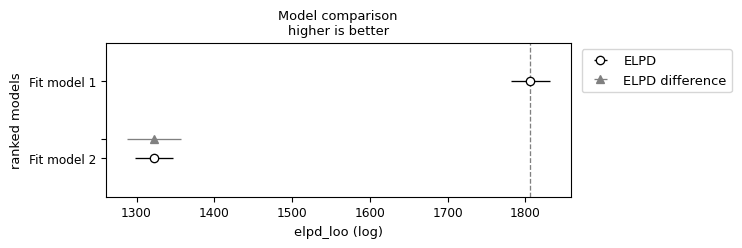

In [76]:
az.plot_compare(compare1)
plt.show()

In [77]:
compare2 = az.compare({"Fit model 1": fit1, "Fit model 2": fit2}, ic="waic")
compare2

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Fit model 1,0,1806.276774,2.058359,0.000000,0.941536,24.88116,0.000000,False,log
Fit model 2,1,1322.498353,2.158453,483.778421,0.058464,24.28757,35.029502,False,log


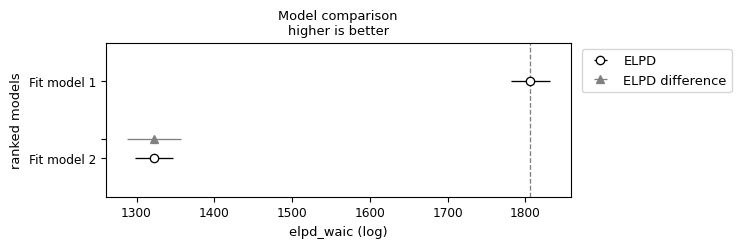

In [78]:
az.plot_compare(compare2)
plt.show()

# Excercise 3 - compare models with different numbers of predictors

In [79]:
fit3 = CmdStanModel(stan_file='code_5.stan')

DEBUG:cmdstanpy:Removing /content/code_5
10:18:27 - cmdstanpy - INFO - compiling stan file /content/code_5.stan to exe file /content/code_5
INFO:cmdstanpy:compiling stan file /content/code_5.stan to exe file /content/code_5
DEBUG:cmdstanpy:cmd: make /content/code_5
cwd: /root/.cmdstan/cmdstan-2.32.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc  --o=/content/code_5.hpp /content/code_5.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.78.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/code_5.o /content/code_5.hpp
g++ -std=c

In [80]:
y_data = df_2.filter(regex='y')
X_data = df_2.filter(regex='X')

y_data = y_data.iloc[0][:1200]
X_data_a = X_data.iloc[0][:1200].values.reshape(len(y_data), 1)
X_data_b = np.column_stack((X_data_a, X_data.iloc[0][1200:2400]))
X_data_c = np.column_stack((X_data_b, X_data.iloc[0][2399:3600]))


In [81]:
data5_a = {'N':N, 
         'K': 1,
         'y': y_data,
         'X': X_data_a}

data5_b = {'N':N, 
         'K': 2,
         'y': y_data,
         'X': X_data_b}

data5_c = {'N':N, 
         'K': 3,
         'y': y_data,
         'X': X_data_c}

In [82]:
gen_quant_3 = fit3.sample(data5_a, seed=28052020)
gen_quant_4 = fit3.sample(data5_b, seed=28052020)
gen_quant_5 = fit3.sample(data5_c, seed=28052020)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/rvbpvetn.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
10:18:58 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/rvbpvetn.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/rvbpvetn.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/rvbpvetn.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:19:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/rvbpvetn.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_1.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_5p9wb6xs_/code_5-20230427101858_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Def

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/s6k1mq_i.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
10:19:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s6k1mq_i.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s6k1mq_i.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s6k1mq_i.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:19:18 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s6k1mq_i.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_1.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_5w0fv1_z3/code_5-20230427101909_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Def

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9u7zf6hp/s5ztc25q.json
DEBUG:cmdstanpy:cmd: /content/code_5 info
cwd: None
10:19:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s5ztc25q.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=2', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s5ztc25q.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_5', 'id=3', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s5ztc25q.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'enga

10:19:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_5', 'id=1', 'random', 'seed=28052020', 'data', 'file=/tmp/tmp9u7zf6hp/s5ztc25q.json', 'output', 'file=/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_1.csv
 console_msgs (if any):
	/tmp/tmp9u7zf6hp/code_5_ctivjw8/code_5-20230427101919_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Def

In [83]:
compare5 = az.compare({"Fit model 1": gen_quant_3, "Fit model 2": gen_quant_4, "Fit model 3": gen_quant_5}, ic="loo")
compare5

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Fit model 3,0,-2778.549435,4.259112,0.000000,9.320192e-01,24.159714,0.000000,False,log
Fit model 1,1,-2795.203871,2.079469,16.654437,6.798075e-02,24.302716,6.228573,False,log
Fit model 2,2,-2795.328870,3.138918,16.779435,2.220446e-16,24.375217,6.179798,False,log


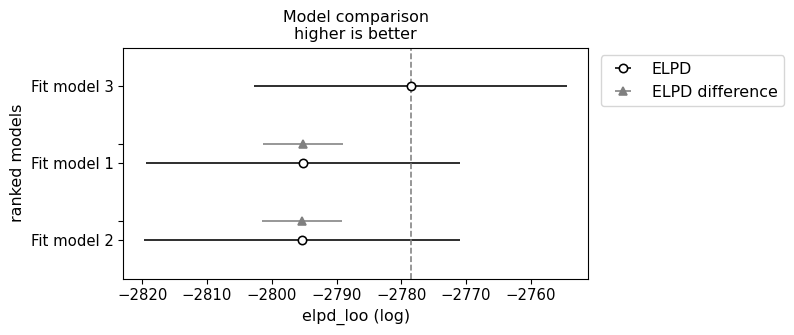

In [84]:
az.plot_compare(compare5)
plt.show()

In [85]:
compare6 = az.compare({"Fit model 1": gen_quant_3, "Fit model 2": gen_quant_4, "Fit model 3": gen_quant_5}, ic="waic")
compare6

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Fit model 3,0,-2778.543392,4.253070,0.000000,0.932122,24.159366,0.000000,False,log
Fit model 1,1,-2795.201445,2.077042,16.658053,0.067878,24.302576,6.228475,False,log
Fit model 2,2,-2795.325064,3.135112,16.781672,0.000000,24.375032,6.179736,False,log


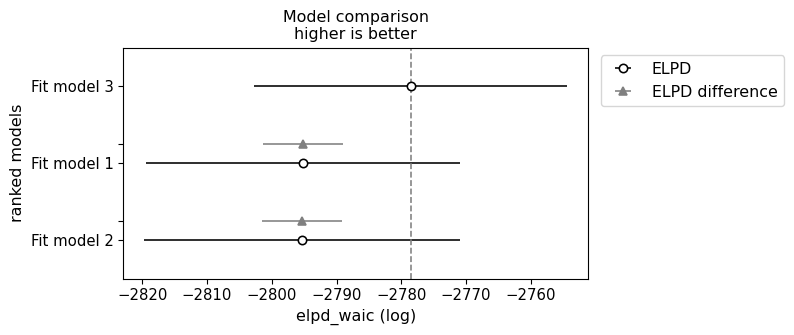

In [86]:
az.plot_compare(compare6)
plt.show()